## Application of our periodicity pipeline and some specific cases noticed on AGN data challenge data





In [1]:
import json
import pandas as pd
import numpy as np
from sqlalchemy.engine import URL
from sqlalchemy.engine import create_engine
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import OptimizeWarning
from dateutil.relativedelta import relativedelta
import warnings
from itertools import groupby

fs_df  = pd.read_parquet('/home/viktor/Downloads/Forced.parquet')
object_df=pd.read_parquet("/home/viktor/Downloads/ObjectTable.parquet")
lc_cols = [col for col in object_df.columns if 'Periodic' in col]
td_objects = object_df.dropna(subset=lc_cols, how='all').copy()
td_objects.head(3)

,ra,dec,psPm_ra,psPm_dec,psParallax,psFlux_u,psFlux_g,psFlux_r,psFlux_i,psFlux_z,...,lcNonPeriodic[27]_g,lcNonPeriodic[27]_r,lcNonPeriodic[27]_i,lcNonPeriodic[27]_z,lcNonPeriodic[28]_u,lcNonPeriodic[28]_g,lcNonPeriodic[28]_r,lcNonPeriodic[28]_i,lcNonPeriodic[28]_z,ebv
objectId,,,,,,,,,,,,,,,,,,,,,
0271388,359.99169,0.969968,NaN,NaN,NaN,26160.979422,294519.269238,1.106956e+06,2.057265e+06,2.982015e+06,...,0.032109,0.030674,0.062576,0.324707,8.555394,2.888606,0.961880,1.213456,0.034117,0.023638
0271389,359.98092,0.652865,NaN,NaN,NaN,48849.324901,77854.298779,7.187044e+04,6.333212e+04,5.460789e+04,...,0.242187,0.034497,0.210657,0.145120,4.915713,0.018316,1.949530,0.051217,0.686231,0.027264
0271390,359.97467,-1.066557,14.123035,-6.600603,-0.013308,58226.877642,196208.333415,3.151411e+05,3.634721e+05,3.904259e+05,...,0.018121,0.008570,0.057029,0.042912,0.975324,5.251484,6.415285,0.447885,1.378181,0.039193


### Example for one object no. 43

In [2]:

setindexqso=td_objects[(td_objects["class"].eq("Qso"))].index
set1=setindexqso[43]

In [3]:
import sys
# Import from local diroctory, the repository will be available on PIP as a final version
sys.path.insert(0, '/home/viktor/Documents/LSST/MAF/inkind/baseperiodicity')
from periodicity import *

In [4]:

fs_gp = fs_df.groupby('objectId')
demo_lc = fs_gp.get_group(set1)
demo_lc_bands = {}
for i, b in enumerate('ugriz'):
    d0=demo_lc[demo_lc['filter'] == i].sort_values(by=['mjd'])
    demo_lc_bands[b] = d0
u_fil = demo_lc_bands['u']
tt = u_fil['mjd'].to_numpy()
yy = u_fil['psMag'].to_numpy()

In [5]:
wwz_matrx, corr, extent = hybrid2d(tt, yy, 80, 800)

*** Starting Weighted Wavelet Z-transform ***

Pseudo sample frequency (median) is  0.505
largest tau window is  33.101


/home/viktor/anaconda3/envs/rubin/lib/python3.9/site-packages/libwwz/wwz.py:261: RuntimeWarning: overflow encountered in double_scalars
  dpowz: float = (dneff - 3.0) * dpower / (2.0 * (dvarw - dpower))  # WWZ eq. 5-12
/home/viktor/anaconda3/envs/rubin/lib/python3.9/site-packages/libwwz/wwz.py:234: RuntimeWarning: overflow encountered in double_scalars
  dvarw = dvarw / dmat[0, 0]
/home/viktor/anaconda3/envs/rubin/lib/python3.9/site-packages/libwwz/wwz.py:234: RuntimeWarning: overflow encountered in double_scalars
  dvarw = dvarw / dmat[0, 0]
/home/viktor/anaconda3/envs/rubin/lib/python3.9/site-packages/libwwz/wwz.py:234: RuntimeWarning: overflow encountered in double_scalars
  dvarw = dvarw / dmat[0, 0]


9.31 seconds has passed to complete Weighted Wavelet Z-transform 



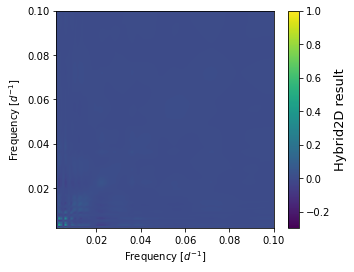

In [6]:
plt_freq_heatmap(corr, extent)

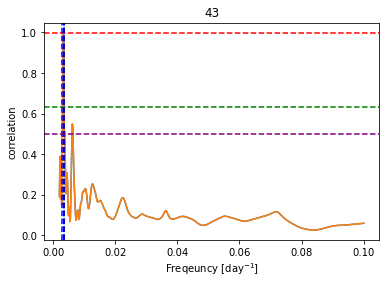

In [7]:
r_periods, up, low = periods (43, corr, 800, plot=True)

In [8]:
# Write down obtained results 
for j in range(len(r_periods)):
    print("Period: %6.3f, upper error : %5.2f  lower error : %5.2f"% (r_periods[j], up[j], low[j]) )

Period: 298.730, upper error : 25.79  lower error :  0.10


## Example no. 23825

*** Starting Weighted Wavelet Z-transform ***

Pseudo sample frequency (median) is  0.5
largest tau window is  28.316


/home/viktor/anaconda3/envs/rubin/lib/python3.9/site-packages/libwwz/wwz.py:261: RuntimeWarning: overflow encountered in double_scalars
  dpowz: float = (dneff - 3.0) * dpower / (2.0 * (dvarw - dpower))  # WWZ eq. 5-12
/home/viktor/anaconda3/envs/rubin/lib/python3.9/site-packages/libwwz/wwz.py:234: RuntimeWarning: overflow encountered in double_scalars
  dvarw = dvarw / dmat[0, 0]
/home/viktor/anaconda3/envs/rubin/lib/python3.9/site-packages/libwwz/wwz.py:234: RuntimeWarning: overflow encountered in double_scalars
  dvarw = dvarw / dmat[0, 0]
/home/viktor/anaconda3/envs/rubin/lib/python3.9/site-packages/libwwz/wwz.py:234: RuntimeWarning: overflow encountered in double_scalars
  dvarw = dvarw / dmat[0, 0]
/home/viktor/anaconda3/envs/rubin/lib/python3.9/site-packages/libwwz/wwz.py:234: RuntimeWarning: overflow encountered in double_scalars
  dvarw = dvarw / dmat[0, 0]


8.22 seconds has passed to complete Weighted Wavelet Z-transform 



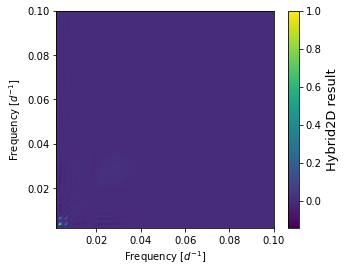

In [9]:
set1=setindexqso[23825]
fs_gp = fs_df.groupby('objectId')
demo_lc = fs_gp.get_group(set1)
demo_lc_bands = {}
for i, b in enumerate('ugriz'):
    d0=demo_lc[demo_lc['filter'] == i].sort_values(by=['mjd'])
    demo_lc_bands[b] = d0
u_fil = demo_lc_bands['u']
tt = u_fil['mjd'].to_numpy()
yy = u_fil['psMag'].to_numpy()
wwz_matrx, corr, extent = hybrid2d(tt, yy, 80, 800)
plt_freq_heatmap(corr, extent)

Period: 278.358, upper error : 27.62  lower error : 26.17


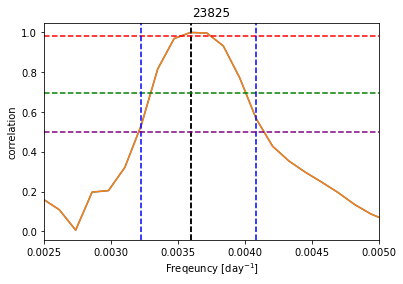

In [13]:
xlim = [0.0025, 0.005]
r_periods, up, low = periods (23825, corr, 800, plot=True, xlim=xlim)
# Blue vertical lines represent the border of a half width of a peak
# Green and red horizontal lines represent the calculated values of a quantiles
# Purple line is a calculated value of half width of a peak
for j in range(len(r_periods)):
    print("Period: %6.3f, upper error : %5.2f  lower error : %5.2f"% (r_periods[j], up[j], low[j]) )

## Example no. 3007

*** Starting Weighted Wavelet Z-transform ***

Pseudo sample frequency (median) is  0.513
largest tau window is  32.986


/home/viktor/anaconda3/envs/rubin/lib/python3.9/site-packages/libwwz/wwz.py:234: RuntimeWarning: overflow encountered in double_scalars
  dvarw = dvarw / dmat[0, 0]


9.06 seconds has passed to complete Weighted Wavelet Z-transform 



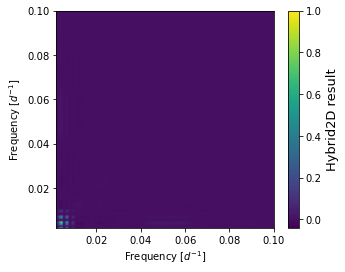

In [14]:
set1=setindexqso[3007]
fs_gp = fs_df.groupby('objectId')
demo_lc = fs_gp.get_group(set1)
demo_lc_bands = {}
for i, b in enumerate('ugriz'):
    d0=demo_lc[demo_lc['filter'] == i].sort_values(by=['mjd'])
    demo_lc_bands[b] = d0
u_fil = demo_lc_bands['u']
tt = u_fil['mjd'].to_numpy()
yy = u_fil['psMag'].to_numpy()
wwz_matrx, corr, extent = hybrid2d(tt, yy, 80, 800)
plt_freq_heatmap(corr, extent)

Period: 224.719, upper error : 21.21  lower error :  8.27


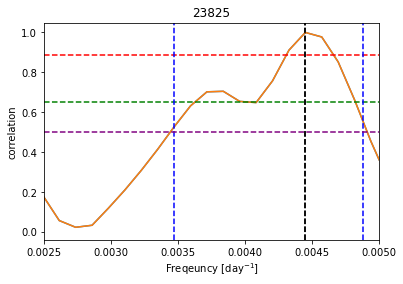

In [15]:
xlim = [0.0025, 0.005]
r_periods, up, low = periods (23825, corr, 800, plot=True, xlim=xlim)
# Blue vertical lines represent the border of a half width of a peak
# Green and red horizontal lines represent the calculated values of a quantiles
# Purple line is a calculated value of half width of a peak
for j in range(len(r_periods)):
    print("Period: %6.3f, upper error : %5.2f  lower error : %5.2f"% (r_periods[j], up[j], low[j]) )